# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

The purpose of this project is to perform an analysis on a data set. The data set chosen for this project contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

**The questions we aim to answer are:**

1. Which genres are most popular from year to year?
2. Do higher movie budgets affect revenues?

In [30]:
# This cell will be used to set up the import statements for the packages that might be used during this analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section I will load in the data set, check for cleanliness, and then trim and clean the data set for analysis.

### General Properties

In [31]:
# Loading the data set and taking a look
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [32]:
# Getting the shape of the df
df.shape

(10866, 21)

Getting the shape of the dataframe shows us that our data set contains 10,866 rows and 21 columns.

In [33]:
# Getting descriptive statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


We use the above method to get some descriptive statistics about our data set so that we can get an idea about the data we're dealing with.

In [34]:
# Checking data types and existance of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

The result of the above method shows us that there are multiple columns (homepage, tagline, keywords, production_companies) that have a significant amount of null values in them.

We can either deal with these null values by filling them with something or we can drop the columns entirely due to the fact that they are not essential to our analysis. I will choose the second option of dropping the columns.

In [35]:
df[df['genres'].isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,363869,tt4835298,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,NaN,Guido Chiesa,NaN,...,"Italian remake of the Mexican 2013 hit, ""We th...",100,NaN,NaN,10/29/15,21,6.1,2015,0.00000,0.0
620,361043,tt5022680,0.129696,0,0,All Hallows' Eve 2,NaN,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,NaN,...,A woman finds a VHS tape on her doorstep that ...,90,NaN,Ruthless Pictures|Hollywood Shorts,10/6/15,13,5.0,2015,0.00000,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.00000,0.0
1712,21634,tt1073510,0.302095,0,0,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,http://www.prayersforbobby.com/,Russell Mulcahy,"Before you echo ""amen"" in your home and place ...",...,"True story of Mary Griffith, gay rights crusad...",88,NaN,Daniel Sladek Entertainment,2/27/09,57,7.4,2009,0.00000,0.0
1897,40534,tt1229827,0.020701,0,0,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,NaN,Bruce Hendricks,NaN,...,Secure your VIP pass to a once-in-a-lifetime e...,76,NaN,NaN,2/27/09,11,7.0,2009,0.00000,0.0
2370,127717,tt1525359,0.081892,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,NaN,Michael Scott,NaN,...,NaN,0,NaN,NaN,6/5/10,12,5.8,2010,0.00000,0.0
2376,315620,tt1672218,0.068411,0,0,Doctor Who: A Christmas Carol,Matt Smith|Karen Gillan|Arthur Darvill|Michael...,NaN,NaN,NaN,...,Amy Pond and Rory Williams are trapped on a cr...,62,NaN,NaN,12/25/10,11,7.7,2010,0.00000,0.0
2853,57892,tt0270053,0.130018,0,0,Vizontele,YÄ±lmaz ErdoÄŸan|Demet Akbag|Altan Erkekli|Cem...,NaN,YÄ±lmaz ErdoÄŸan,NaN,...,The story takes place in a small town (called ...,110,NaN,NaN,2/2/01,12,7.2,2001,0.00000,0.0
3279,54330,tt1720044,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,Jang Keun-suk|Song Ha-yoon|Kim Jeong-Nan,NaN,Kim Jin-Yeong,NaN,...,Joon-soo (Jang Geun -Seok) is a rebellious hig...,96,NaN,NaN,8/13/08,11,6.1,2008,0.00000,0.0
4547,123024,tt2305700,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Queen Elizabeth II|Mike Oldfield|Kenneth Brana...,http://www.london2012.com/,Danny Boyle,Inspire a generation.,...,The London 2012 Olympic Games Opening Ceremony...,220,NaN,BBC,7/27/12,12,8.3,2012,0.00000,0.0


From the .info() method we see that the genres column has some null values so we decided to inspect those rows since the genres column is vital for our analysis.

**As a result of this inspection it has been decided to drop these rows for the following reasons:**

1. The amount of rows with null values is insignificant compared to the size of the data set (24 rows in a data set of 10,866 rows).
2. The most recent film is almost 10 years old and the oldest film is more than 50 years old.
3. The genres column is not a numerical column so the null values can't be filled with the mean (for example).

### Data Cleaning (dropping unnecessary columns)

The following columns will be dropped:

- **imdb_id:** unnecessary and contains null values
- **cast:** unnecessary and contains null values
- **homepage:** unnecessary and contains significant amount of null values
- **director:** unnecessary and contains null values
- **tagline:** unnecessary and contains significant amount of null values
- **production_companies:** unnecessary and contains significant amount of null values
- **release_date:** unnecessary because we already have the release_year

In [37]:
z = np.array(['imdb_id', 'cast', 'homepage', 'director', 'tagline', 'production_companies', 'release_date'])
df.drop(z, axis=1, inplace=True)

### Data Cleaning (dropping null rows)

The rows containing null values in the genres column will be dropped due to the reasons stated above.

In [38]:
df.dropna(axis=0, inplace=True)

The following cells are to make sure the dropping happened correctly and that there are no more null values.

In [39]:
df.head(2)

,id,popularity,budget,revenue,original_title,keywords,overview,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08


In [40]:
df.isnull().sum().sum()

0

The results of the above cells confirm that the dropping happened as intended and that there are no null values.

In [41]:
df.shape

(9366, 14)

The new shape of the data frame is 9,366 rows and 14 columns.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Which genres are most popular from year to year?)

In [42]:
# To answer this question we will compare movies from 2005 and 2015
# We will separate these rows into new data frames and analyze those
df_05 = df[df['release_year'] == 2005]
df_15 = df[df['release_year'] == 2015]

In [43]:
df_05.head(2)

,id,popularity,budget,revenue,original_title,keywords,overview,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
6190,674,5.939927,150000000,895921036,Harry Potter and the Goblet of Fire,diving|library|flying|fireworks|cutting the cord,"Harry starts his fourth year at Hogwarts, comp...",157,Adventure|Fantasy|Family,3406,7.3,2005,1.674845e+08,1.000353e+09
6191,272,5.400826,150000000,374218673,Batman Begins,martial arts|dc comics|crime fighter|secret id...,"Driven by tragedy, billionaire Bruce Wayne ded...",140,Action|Crime|Drama,4914,7.3,2005,1.674845e+08,4.178388e+08


In [44]:
df_05.shape

(329, 14)

In [45]:
df_15.head(2)

,id,popularity,budget,revenue,original_title,keywords,overview,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08


In [46]:
df_15.shape

(479, 14)

In [47]:
df_05['popularity'].describe()

count    329.000000
mean       0.669720
std        0.726263
min        0.021261
25%        0.260956
50%        0.443094
75%        0.824869
max        5.939927
Name: popularity, dtype: float64

In [48]:
# We get the rows with popularity in 75th percentile
x = df_05[df_05['popularity'] >= 0.824869]
x

,id,popularity,budget,revenue,original_title,keywords,overview,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
6190,674,5.939927,150000000,895921036,Harry Potter and the Goblet of Fire,diving|library|flying|fireworks|cutting the cord,"Harry starts his fourth year at Hogwarts, comp...",157,Adventure|Fantasy|Family,3406,7.3,2005,1.674845e+08,1.000353e+09
6191,272,5.400826,150000000,374218673,Batman Begins,martial arts|dc comics|crime fighter|secret id...,"Driven by tragedy, billionaire Bruce Wayne ded...",140,Action|Crime|Drama,4914,7.3,2005,1.674845e+08,4.178388e+08
6192,411,3.628726,180000000,748806957,"The Chronicles of Narnia: The Lion, the Witch ...",saving the world|witch|based on novel|brother ...,"Siblings Lucy, Edmund, Susan and Peter step th...",143,Adventure|Family|Fantasy,1402,6.5,2005,2.009814e+08,8.360904e+08
6193,752,3.617106,54000000,132511035,V for Vendetta,detective|vatican|fascism|satanism|fascist,In a world in which Great Britain has become a...,132,Action|Thriller|Fantasy,2670,7.6,2005,6.029442e+07,1.479570e+08
6194,187,3.520836,40000000,158733820,Sin City,dystopia|based on comic book|based on graphic ...,Welcome to Sin City. This town beckons to the ...,124,Action|Thriller|Crime,1691,7.1,2005,4.466253e+07,1.772364e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6269,231,0.835676,50000000,94000000,Syriana,anti terror|bomb|assassination|middle east|leb...,The Middle Eastern oil industry is the backdro...,128,Drama|Thriller,245,6.0,2005,5.582816e+07,1.049569e+08
6270,10214,0.832054,84000000,0,Son of the Mask,baby|mask|viking,"Tim Avery, an aspiring cartoonist, finds himse...",94,Fantasy|Comedy|Family|Adventure,169,3.9,2005,9.379132e+07,0.000000e+00
6271,8999,0.826770,22000000,57479076,Derailed,prison|chicago|rape|based on novel|hotel room,When two married business executives having an...,108,Drama|Thriller,173,6.2,2005,2.456439e+07,6.417903e+07
6272,257,0.826568,50000000,42093706,Oliver Twist,london|child abuse|street gang|runaway|child l...,Oliver Twist the modern filmed version of Char...,130,Crime|Drama|Family,143,6.6,2005,5.582816e+07,4.700029e+07


In [49]:
# We use .value_counts to get the 5 most common genres with popularity in the 75th percentile
x1 = x['genres'].value_counts()[:5]
x1

Comedy|Drama|Romance       5
Comedy|Romance             4
Comedy                     4
Drama                      2
Animation|Comedy|Family    2
Name: genres, dtype: int64

In [50]:
# This function is to avoid repetitive code for generating similar plots over different data
def bar_counts(counts, year):
    counts.plot(kind='bar', figsize=(4,3))
    plt.title('Counts of 5 most common popular Genres in {}'.format(year))
    plt.xlabel('Genres')
    plt.ylabel('Counts');

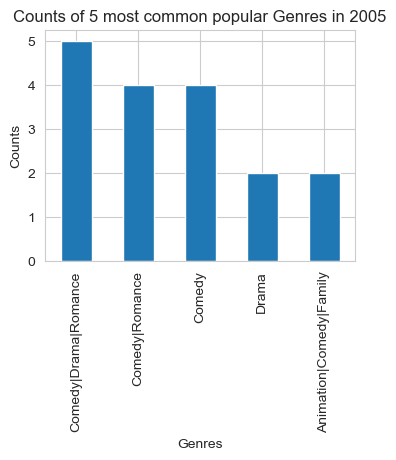

In [51]:
bar_counts(x1, '2005')

I decided to use a bar chart to plot this info just to give a visual representation of the counts.

In [52]:
df_15['popularity'].describe()

count    479.000000
mean       1.258327
std        2.514099
min        0.014647
25%        0.243506
50%        0.475473
75%        1.358325
max       32.985763
Name: popularity, dtype: float64

In [53]:
# We do the same for 2015
y = df_15[df_15['popularity'] >= 1.358325]
y

,id,popularity,budget,revenue,original_title,keywords,overview,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,304357,1.388032,11000000,61619773,Woman in Gold,nazis|art|stolen painting,"Maria Altmann, an octogenarian Jewish refugee,...",120,Drama,277,7.3,2015,1.012000e+07,5.669017e+07
116,297291,1.380320,0,0,The Scorpion King: The Lost Throne,magic|fantasy|steampunk|dragon,"When he is betrayed by a trusted friend, Matha...",105,Action|Fantasy|Adventure,22,4.5,2015,0.000000e+00,0.000000e+00
117,266294,1.376605,30000000,105011053,Sisters,sister sister relationship|childhood home,Two disconnected sisters are summoned to clean...,118,Comedy,399,5.9,2015,2.759999e+07,9.661013e+07
118,227719,1.360926,12000000,32248241,Project Almanac,time travel|time machine|teenager|found footage,A group of teens discover secret plans of a ti...,106,Science Fiction|Thriller,637,6.3,2015,1.104000e+07,2.966837e+07


In [54]:
y1 = y['genres'].value_counts()[:5]
y1

Comedy                              8
Drama                               6
Action|Crime|Thriller               3
Comedy|Drama                        3
Action|Adventure|Science Fiction    3
Name: genres, dtype: int64

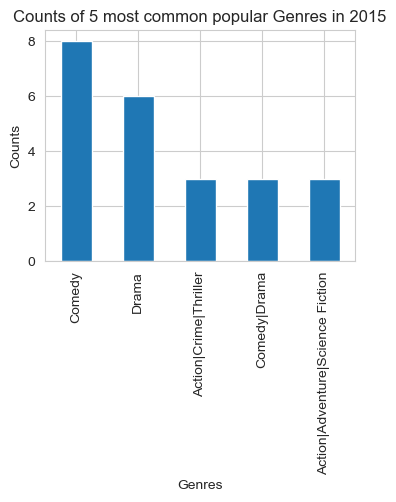

In [55]:
bar_counts(y1, '2015')

### Research Question 2  (Do higher movie budgets affect revenues?)

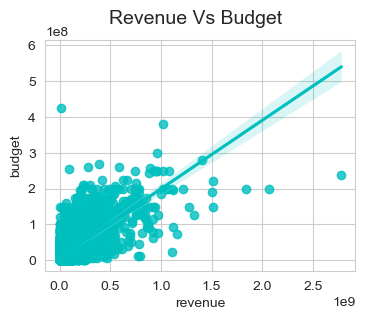

In [56]:
fig, axes = plt.subplots(1,1,figsize = (4,3))
fig.suptitle("Revenue Vs Budget",fontsize=14)
sns.regplot(x=df['revenue'], y=df['budget'],color='c')
sns.set_style("whitegrid");

I used sns.regplot because it is used to plot data and a linear regression model fit.

**Why use regression analysis?**
- Because regression analysis is a statistical process used to estimate the relationships between dependent variables and one or more independent variables.

<a id='conclusions'></a>
## Conclusions

**Results of Research Question 1:**

As we can see from the two bar charts 2005 and 2015 have two common most popular genres:
- **Drama:** Increased from 2 in 2005 to 6 in 2015
- **Comedy:** Increased from 4 in 2005 to 8 in 2015

**Results of Research Question 2:**

We can see from the plotting we have done that higher budgets correspond to an increase in revenues.

- In my opinion this can be due to the fact that since the budget is higher more 'bells and whistles' so to speak can be added to the movie which will more attention from viewers and give them a more pleasant experience which will in turn increase revenues.

<a id='limitations'></a>
## Limitations

One of the main limitations of this data set is that the most recent movie release year included is 2015 while we are in the year 2023. So it would have been nice to analyze more recent films.